In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

sns.set_context("poster")

#read file from EDA
demographics2 = pd.read_csv('demographics2.csv')

In [82]:
from sklearn.preprocessing import MinMaxScaler


# copy your original data frame, which includes all variables
data_cluster = demographics2.copy()

# drop Country column
data_cluster.drop( "Country", inplace=True, axis=1)

# scale data
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(data_cluster)
print(data_cluster.head())
data_cluster.literacy_avg.describe()
Xdf = pd.DataFrame(X_train_minmax)
Xdf.columns = data_cluster.columns
print(Xdf.head())

   Unnamed: 0  badteeth  literacy_avg  water_avg      GDP_avg   sugar_avg  \
0           0      3.02     98.712978       88.0  1011.752695   49.504318   
1           1      2.30     59.752193       90.4  1625.140989   67.995227   
2           2      1.70     67.405416       38.4   318.739949   33.129091   
3           3      0.70     98.950000       98.0  7874.822798   98.443182   
4           4      2.70     98.737052       98.0  1196.023043  100.526923   

   health_avg  Low_BMI  Adolescent birth rate  Tobacco_Use  Smokers  
0   24.751387      1.9                   19.7         11.8     11.5  
1   50.424490      6.2                   12.4          9.0      5.7  
2   12.275108     10.3                  190.9         19.8      2.3  
3  259.996606      3.5                   66.8         11.9      7.4  
4   64.079201      2.5                   21.6         26.9     26.5  
   Unnamed: 0  badteeth  literacy_avg  water_avg   GDP_avg  sugar_avg  \
0    0.000000  0.485714      0.989593   0.85

Text(0.5,1,'Scaled GDP')

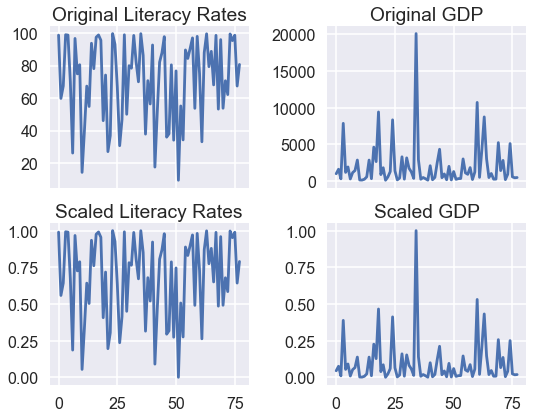

In [83]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(8, 6))
fig.tight_layout()
ax1.plot(data_cluster.literacy_avg)
ax1.set_title("Original Literacy Rates")
ax2.plot(data_cluster.GDP_avg)
ax2.set_title("Original GDP")
ax3.plot(Xdf.literacy_avg)
ax3.set_title("Scaled Literacy Rates")
ax4.plot(Xdf.GDP_avg)
ax4.set_title("Scaled GDP")

Text(0.5,1,'Scaled GDP')

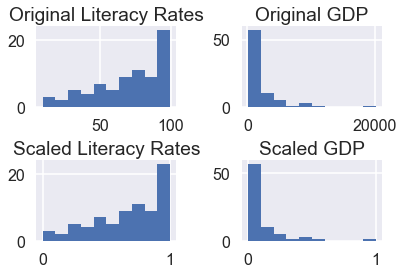

In [84]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.tight_layout()
ax1.hist(data_cluster.literacy_avg)
ax1.set_title("Original Literacy Rates")
ax2.hist(data_cluster.GDP_avg)
ax2.set_title("Original GDP")
ax3.hist(Xdf.literacy_avg)
ax3.set_title("Scaled Literacy Rates")
ax4.hist(Xdf.GDP_avg)
ax4.set_title("Scaled GDP")

In [85]:
from sklearn.cluster import KMeans

# perform KMeans clustering
clustered_data = KMeans(n_clusters=4, random_state=0).fit_predict(X_train_minmax)

# add cluster labels to df
df_cluster = pd.DataFrame(clustered_data)
demo_cluster = pd.concat([data_cluster, df_cluster], axis=1)
demo_cluster.rename(columns={"0": "cluster", "Unnamed: 0" : "Country"}, inplace=True)

countries = list(demographics2['Country'])
teeth =list(demographics2['badteeth'])

df = pd.DataFrame({'labels' : clustered_data, 'Countries' : countries, 'badteeth' : teeth})

print(df.head())

             Countries  badteeth  labels
0              Albania      3.02       3
1              Algeria      2.30       3
2               Angola      1.70       1
3  Antigua and Barbuda      0.70       3
4              Belarus      2.70       2


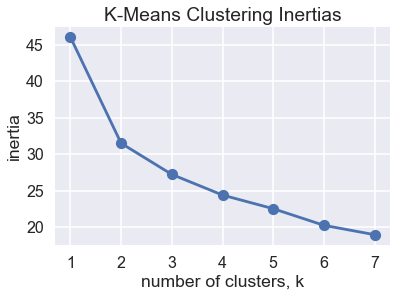

In [87]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train_minmax)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('K-Means Clustering Inertias')
plt.show()

In [88]:
# Find the inertia for four clusters
fourclusters = KMeans(n_clusters=4, random_state=0).fit(X_train_minmax)
print(fourclusters.inertia_)

24.5432657016


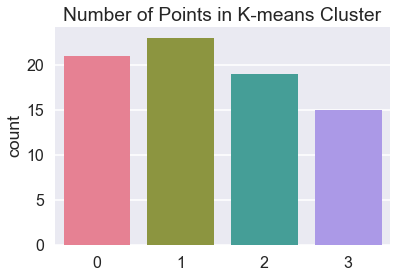

In [89]:
# Show number of countries in each cluster for KNN
plt.figure()
cluster_size = df.groupby(clustered_data).size()

sns.countplot(clustered_data, palette='husl').set_title('Number of Points in K-means Cluster')

plt.show()

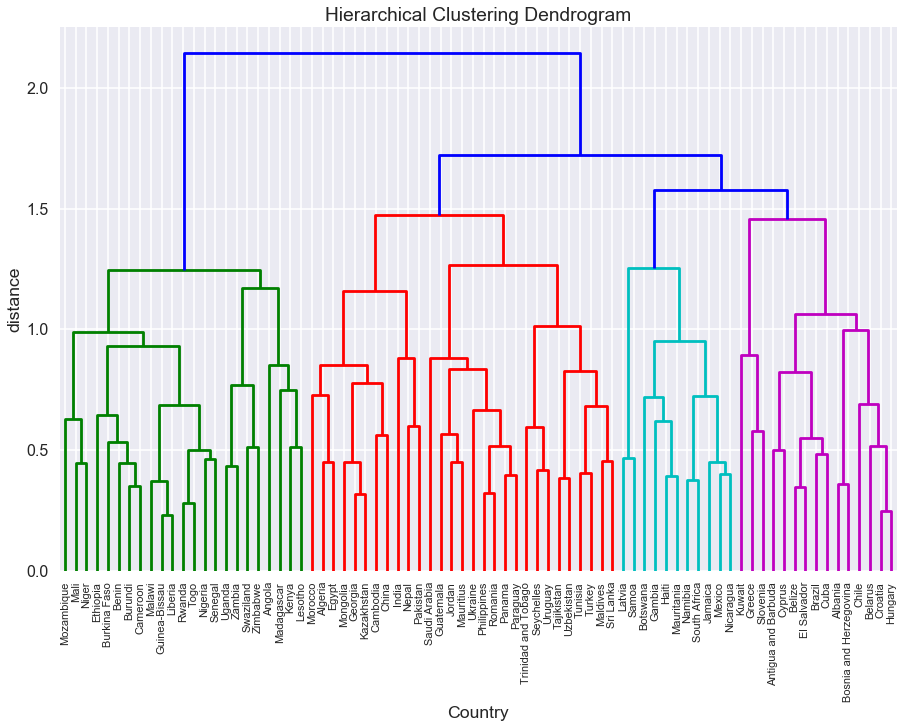

In [90]:
#Perform hierarchical clustering
mergings = linkage(X_train_minmax, method='complete')

# Plot on a Dendrogram
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('distance')
dendrogram(mergings,
           labels=countries,
           leaf_rotation=90,
           leaf_font_size=11,
)


plt.show()

In [91]:
#Gather the cluster labels from hierarchical clustering
flabels = fcluster(mergings, 1.5, criterion='distance')
print(flabels)

[4 2 1 4 4 4 1 4 3 4 1 1 2 1 4 2 4 4 4 2 4 1 3 2 4 2 1 3 4 2 3 2 2 1 4 3 1
 1 1 1 2 1 3 2 3 2 2 1 3 2 3 1 1 2 2 2 2 2 1 3 2 1 2 4 3 2 1 2 1 2 2 2 1 2
 2 2 1 1]


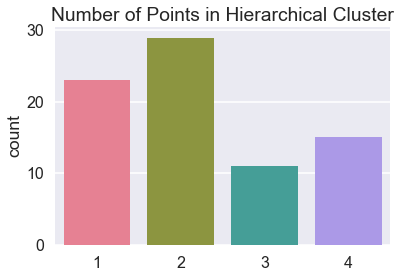

In [92]:
#Show number of countries in each cluster for Hierarchical
plt.figure()

cluster_size = df.groupby(flabels).size()

sns.countplot(flabels, palette='husl').set_title('Number of Points in Hierarchical Cluster')

plt.show()

In [93]:
demograph= demographics2.loc[:, 'Country':'Smokers'].astype(str)
demograph.Country = demograph.Country.astype(str)
demograph.Country = demograph.Country.str.encode('utf-8')

print(demograph.head())

                  Country badteeth   literacy_avg water_avg        GDP_avg  \
0              b'Albania'     3.02  98.7129780777      88.0  1011.75269494   
1              b'Algeria'      2.3  59.7521926392      90.4   1625.1409887   
2               b'Angola'      1.7  67.4054160383      38.4  318.739948801   
3  b'Antigua and Barbuda'      0.7          98.95      98.0  7874.82279781   
4              b'Belarus'      2.7  98.7370522886      98.0  1196.02304297   

       sugar_avg     health_avg Low_BMI Adolescent birth rate Tobacco_Use  \
0  49.5043181818  24.7513865611     1.9                  19.7        11.8   
1  67.9952272727  50.4244901922     6.2                  12.4         9.0   
2  33.1290909091  12.2751083489    10.3                 190.9        19.8   
3  98.4431818182  259.996606047     3.5                  66.8        11.9   
4  100.526923077  64.0792013689     2.5                  21.6        26.9   

  Smokers  
0    11.5  
1     5.7  
2     2.3  
3     7.4  
4    26.

In [94]:
#Read and clean country and regions
world = pd.read_excel('countries of the world.xls', header = 3).loc[1:, 'Country':'Region'].astype(str)
world.Country = world.Country.astype(str)
world.Country = world.Country.str[:-1]
world.Country = world.Country.str.replace('&','and')
world.Country = world.Country.str.encode('utf-8')

print(world.head())

             Country                               Region
1     b'Afghanistan'        ASIA (EX. NEAR EAST)         
2         b'Albania'  EASTERN EUROPE                     
3         b'Algeria'  NORTHERN AFRICA                    
4  b'American Samoa'  OCEANIA                            
5         b'Andorra'  WESTERN EUROPE                     


In [95]:
regionscheck = pd.merge(demograph, world, on='Country', how='left')
regionscheck.Region = regionscheck.Region.fillna('SUB-SAHARAN AFRICA                   ')
print(regionscheck.head())

                  Country badteeth   literacy_avg water_avg        GDP_avg  \
0              b'Albania'     3.02  98.7129780777      88.0  1011.75269494   
1              b'Algeria'      2.3  59.7521926392      90.4   1625.1409887   
2               b'Angola'      1.7  67.4054160383      38.4  318.739948801   
3  b'Antigua and Barbuda'      0.7          98.95      98.0  7874.82279781   
4              b'Belarus'      2.7  98.7370522886      98.0  1196.02304297   

       sugar_avg     health_avg Low_BMI Adolescent birth rate Tobacco_Use  \
0  49.5043181818  24.7513865611     1.9                  19.7        11.8   
1  67.9952272727  50.4244901922     6.2                  12.4         9.0   
2  33.1290909091  12.2751083489    10.3                 190.9        19.8   
3  98.4431818182  259.996606047     3.5                  66.8        11.9   
4  100.526923077  64.0792013689     2.5                  21.6        26.9   

  Smokers                               Region  
0    11.5  EASTERN 

In [100]:
#Compare number of countries in specific regions vs. cluster label for KNN

df['Region'] = regionscheck['Region']

Kmeans = pd.crosstab(df['labels'], df['Region'])
display(Kmeans)

Region,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,OCEANIA,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA,WESTERN EUROPE
labels,,,,,,,,,,,
0,4,0,2,1,4,1,2,0,7,0,0
1,2,0,0,0,1,0,0,0,19,1,0
2,0,1,2,3,5,4,0,1,2,0,1
3,3,0,2,2,5,0,2,0,1,0,0


Text(0.5,1,'# of countries in in region per K-Means cluster')

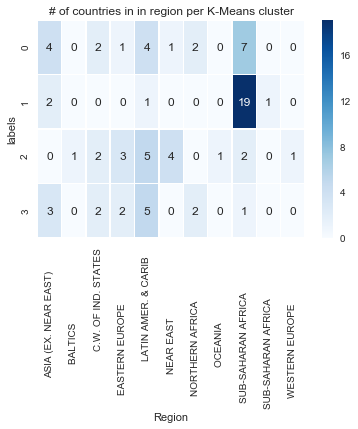

In [101]:
sns.set(font_scale = 1)
sns.heatmap(Kmeans, annot=True, cmap='Blues', linewidths=0.5).set_title('# of countries in in region per K-Means cluster')

In [102]:
#Compare number of countries in specific regions vs. cluster label for Hierarchical

df['flabels'] = flabels
hier = pd.crosstab(df['flabels'], df['Region'])
display(hier)

Region,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,OCEANIA,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA,WESTERN EUROPE
flabels,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,23,0,0
2,9,0,5,1,5,3,4,0,2,0,0
3,0,1,0,0,4,0,0,1,4,1,0
4,0,0,1,5,6,2,0,0,0,0,1


Text(0.5,1,'# of countries in in region per hierarchical cluster')

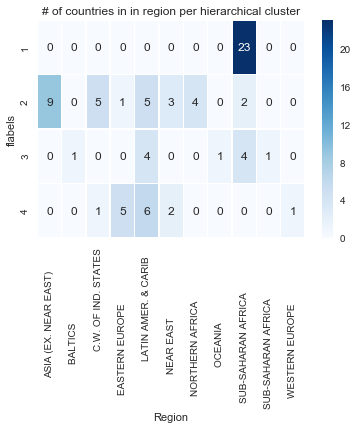

In [104]:
sns.heatmap(hier, annot=True, cmap='Blues', linewidths=0.5).set_title('# of countries in in region per hierarchical cluster')

badteethrounded,0.0,1.0,2.0,3.0,4.0,5.0,6.0
labels,,,,,,,
0,1,10,5,3,2,0,0
1,6,9,6,2,0,0,0
2,0,3,6,6,2,1,1
3,1,5,4,2,1,2,0


badteeth                                                 
          count      mean       std  min    25%  50%    75%  max
labels                                                          
0          21.0  1.815714  0.938715  0.4  1.200  1.4  2.500  3.8
1          23.0  1.250435  0.846627  0.3  0.575  1.0  1.625  3.1
2          19.0  2.817895  1.286889  1.1  1.900  2.6  3.400  5.9
3          15.0  2.271333  1.477521  0.5  1.105  2.1  2.910  5.2

Text(0.5,1,'# of bad teeth  per k-means cluster')

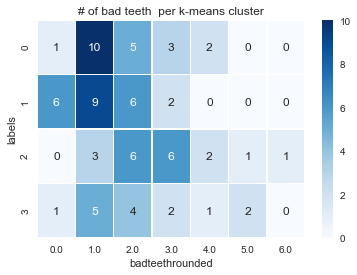

In [107]:
#Compare number of bad teeth rounded to nearest integer vs. cluster label for KNN

df['badteethrounded'] = df.badteeth.apply(np.round)

Kmeansteeth = pd.crosstab(df['labels'], df['badteethrounded'])
display(Kmeansteeth)

# Compare the distributions of badteeth between clusters

kmeanstable = pd.DataFrame({"labels" : df['labels'], "badteeth" : df['badteeth']})
display(kmeanstable.groupby('labels').describe())

sns.heatmap(Kmeansteeth, annot=True, cmap='Blues', linewidths=0.5).set_title('# of bad teeth  per k-means cluster')

Text(0.5,0,'Cluster')

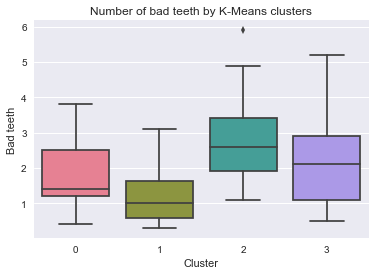

In [109]:
# Graph distributions of badteeth between clusters for KNN

ax = sns.boxplot(x="labels", y="badteeth", data=knntable, palette='husl')
plt.title("Number of bad teeth by K-Means clusters")
plt.ylabel("Bad teeth")
plt.xlabel("Cluster")

badteethrounded,0.0,1.0,2.0,3.0,4.0,5.0,6.0
flabels,,,,,,,
1,6,10,5,2,0,0,0
2,1,8,9,4,4,2,1
3,1,4,5,1,0,0,0
4,0,5,2,6,1,1,0


badteeth                                                 
           count      mean       std  min    25%  50%    75%  max
flabels                                                          
1           23.0  1.213478  0.813548  0.3  0.600  1.0  1.525  3.1
2           29.0  2.518276  1.391320  0.5  1.400  2.3  3.300  5.9
3           11.0  1.654545  0.875344  0.5  1.075  1.5  2.150  3.4
4           15.0  2.357333  1.181545  0.6  1.400  2.6  3.160  4.8

Text(0.5,1,'# of bad teeth  per hierarchical cluster')

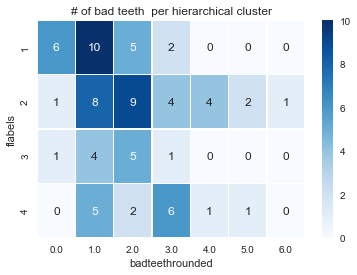

In [110]:
#Compare number of bad teeth rounded to nearest integer vs. cluster label for Hierarchical

hier = pd.crosstab(df['flabels'], df['badteethrounded'])
display(hier)

# Compare the distributions of badteeth between clusters

hiertable = pd.DataFrame({"flabels" : df['flabels'], "badteeth" : df['badteeth']})
display(hiertable.groupby('flabels').describe())

sns.heatmap(hier, annot=True, cmap='Blues', linewidths=0.5).set_title('# of bad teeth  per hierarchical cluster')

Text(0.5,0,'Cluster')

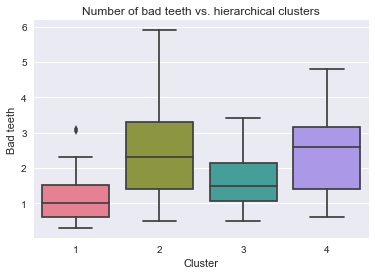

In [111]:
# Graph distributions of badteeth between clusters for hierarchical clustering

ax = sns.boxplot(x="flabels", y="badteeth", data=hiertable, palette='husl')
plt.title("Number of bad teeth vs. hierarchical clusters")
plt.ylabel("Bad teeth")
plt.xlabel("Cluster")


In [112]:
# create and fit pca
pca = PCA(n_components=10)
pca.fit(X_train_minmax)

# print results  
print(pca.explained_variance_ratio_.cumsum())

[ 0.42901599  0.57717829  0.68602623  0.75888298  0.82288619  0.88242659
  0.93121279  0.95992175  0.97898778  0.99261166]


### So does this mean that using 2 components, I would retain 57.7% of the variance?

In [113]:
# Create table of PCA and Kmeans cluster labels
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_minmax)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['labels']]], axis = 1)
print(finalDf.tail())

    principal component 1  principal component 2  labels
73              -0.604278               0.448725       2
74              -0.475920               0.496369       2
75               0.003527               0.541613       0
76               0.423736               0.460940       0
77               0.273890               0.531976       0


Text(0.5,1,'2D PCA for K-Means Clustering')

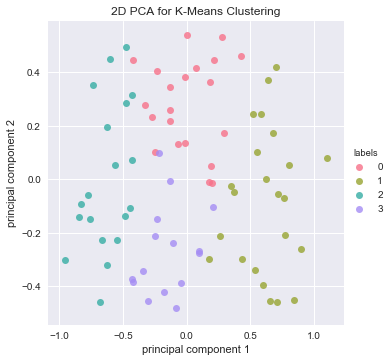

In [114]:
# Plot PCA for kmeans
sns.lmplot("principal component 1", "principal component 2", finalDf, hue="labels", fit_reg=False, palette='husl')
plt.title("2D PCA for K-Means Clustering")

In [115]:
# Create table of PCA and Hierarchical cluster labels
pca = PCA(n_components=2)
fprincipalComponents = pca.fit_transform(X_train_minmax)
fprincipalDf = pd.DataFrame(data = fprincipalComponents
             , columns = ['principal component 1', 'principal component 2'])

ffinalDf = pd.concat([fprincipalDf, df[['flabels']]], axis = 1)
print(ffinalDf.tail())

    principal component 1  principal component 2  flabels
73              -0.604278               0.448725        2
74              -0.475920               0.496369        2
75               0.003527               0.541613        2
76               0.423736               0.460940        1
77               0.273890               0.531976        1


Text(0.5,1,'2D PCA for hierarchical Clustering')

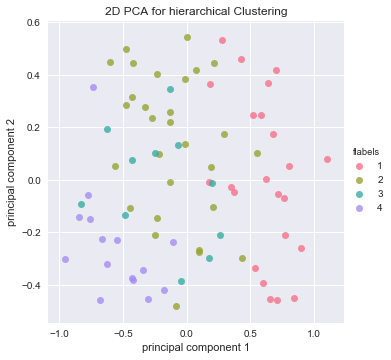

In [116]:
# Plot PCA for hierarchical
sns.lmplot("principal component 1", "principal component 2", ffinalDf, hue="flabels", fit_reg=False, palette='husl')
plt.title("2D PCA for hierarchical Clustering")